
# Homework 3 - Problemi inversi e imaging
Questo homework utilizza anche il pacchetto InverseProblems scaricabile
dal sito di Virtuale del corso.

## 2. Image deblur - KERNEL (11,3)

Scegliere una immagine a piacere (no cameraman!!!) in scala di grigi ed
eseguire i seguenti punti:
- Creare un problema test

In [3]:
from ProblemiInversi import examples ,operators ,solvers ,utilities
import numpy as np
import matplotlib.pyplot as plt

from skimage import data

# Lettura dei dati da skimage
x = data.checkerboard()
nx, ny = x.shape

# Normalizzo l'immagine portandola in una scala [0,1]
x = x / x.max()

#kernel_list=[(11,3),(21,5)] #(k,sigma)

#diversi livelli di rumore nell’intervallo[0, 0.01]
noise_lvl_list = [0, 0.0001, 0.001 ,0.01]
#conterrà le immagini corrotte dai vari livelli li rumore
y_delta_list= []

# Definizione kernel di blur(dimensione K x k e derivazione standard sigma)
# e operatore associato   
kernel = utilities.gaussian2d_kernel(k=11, sigma=3)
A = operators.ConvolutionOperator(kernel)

# Sfocatura dell'immagine x con operatore di convoluzione A 
y = A(x)    
#aggiunta del rumore a y
for i, noise_level in enumerate(noise_lvl_list):
    y_delta = y + utilities.gaussian_noise(y, noise_level)
    y_delta_list.append(y_delta)


- Calcolare la soluzione naive risolvendo il problema di minimi quadrati
con CGLS


===NOISE = 0===
ER   = 0.036939888181344575
PSNR = 31.851321964270447
SSIM = 0.6840570861889342

===NOISE = 0.0001===
ER   = 0.037534388830863366
PSNR = 31.712646520201197
SSIM = 0.678781246598634

===NOISE = 0.001===
ER   = 0.057981294368925455
PSNR = 27.935475368305486
SSIM = 0.5787795453476987

===NOISE = 0.01===
ER   = 0.5913417622035316
PSNR = 7.764462470446388
SSIM = 0.18292226259331315


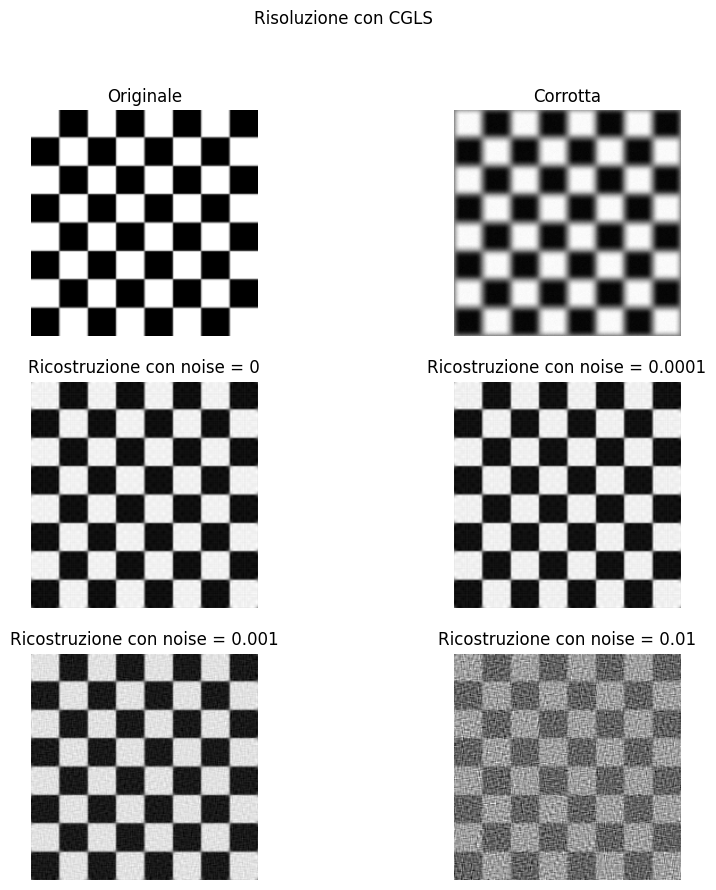

In [4]:
#Calcolo della soluzione NAIVE come soluzione del problema dei minimi quadrati
# con le equazioni normali

# CGLS
cgls_solver = solvers.CGLS(A)

# Scelta di x0, kmax, atolf, tolx
x0 = np.zeros_like(x)
kmax = 200
tolf = 1e-8
tolx = 1e-8

#contenitore delle soluzioni
x_cgls_list=[]

#soluzione con diversi livelli di rumore nell’intervallo[0, 0.01]
for i, noise_level in enumerate(noise_lvl_list):
    #y_delta_list[i] è il vettore dei dati osservati. immagine sfocata + rumore
    x_cgls = cgls_solver.solve(y_delta_list[i], x0, kmax, tolf, tolx)
    x_cgls_list.append(x_cgls)
    
    print(f'\n===NOISE = {noise_level}===')
    print('ER   =',utilities.rel_err(x_cgls,x))
    print('PSNR =',utilities.psnr(x_cgls,x))
    print('SSIM =',utilities.ssim(x_cgls,x))

#plot grafici
plt.figure(figsize=(10,10))
plt.suptitle("Risoluzione con CGLS")

plt.subplot(3, 2, 1)
plt.imshow(x, cmap="gray")
plt.title("Originale")
plt.axis("off")

plt.subplot(3, 2, 2)
plt.imshow(y_delta_list[i], cmap="gray")
plt.axis("off")
plt.title("Corrotta")

for i, noise_level in enumerate(noise_lvl_list):
    # Visualizzazione ricostruzione
    plt.subplot(3, 2, 3+i)
    plt.imshow(x_cgls_list[i], cmap="gray")
    plt.axis("off")
    plt.title(f"Ricostruzione con noise = {noise_level}")

    
plt.show()        


- Calcolare la soluzione regolarizzata con Tikhonov. 
- Calcolare il valore di λ sia con il principio di Massima Discrepanza che come valore
che minimizza l’errore assoluto fra l’immagine ground truth e la ricostruzione 
(su una griglia di valori di λ), 
visualizzando il grafico
relativo.




=== Tikhonov: Noise = 0 =========

---lmbda = 1.000e-04---
ER   = 0.0369490007826898
PSNR = 31.849179529836494
SSIM = 0.6840415484180769

---lmbda = 2.783e-04---
ER   = 0.03696120593681481
PSNR = 31.84631084288744
SSIM = 0.6841130762573889

---lmbda = 7.743e-04---
ER   = 0.03705351737310854
PSNR = 31.824644684375624
SSIM = 0.6846484117755964

---lmbda = 2.154e-03---
ER   = 0.03807535766423446
PSNR = 31.58835366161113
SSIM = 0.6867997288886482

---lmbda = 5.995e-03---
ER   = 0.052630111799137874
PSNR = 28.7765476425233
SSIM = 0.6329129757444623

---lmbda = 1.668e-02---
ER   = 0.10941969279739147
PSNR = 22.419323671140653
SSIM = 0.49655419123816696

---lmbda = 4.642e-02---
ER   = 0.16037598239930642
PSNR = 19.098446899708833
SSIM = 0.4483075900807548

---lmbda = 1.292e-01---
ER   = 0.18588716256660737
PSNR = 17.81624552829714
SSIM = 0.45854306862813066

---lmbda = 3.594e-01---
ER   = 0.26124830061658955
PSNR = 14.860164011750381
SSIM = 0.4378920596220532

---lmbda = 1.000e+00---
ER   = 

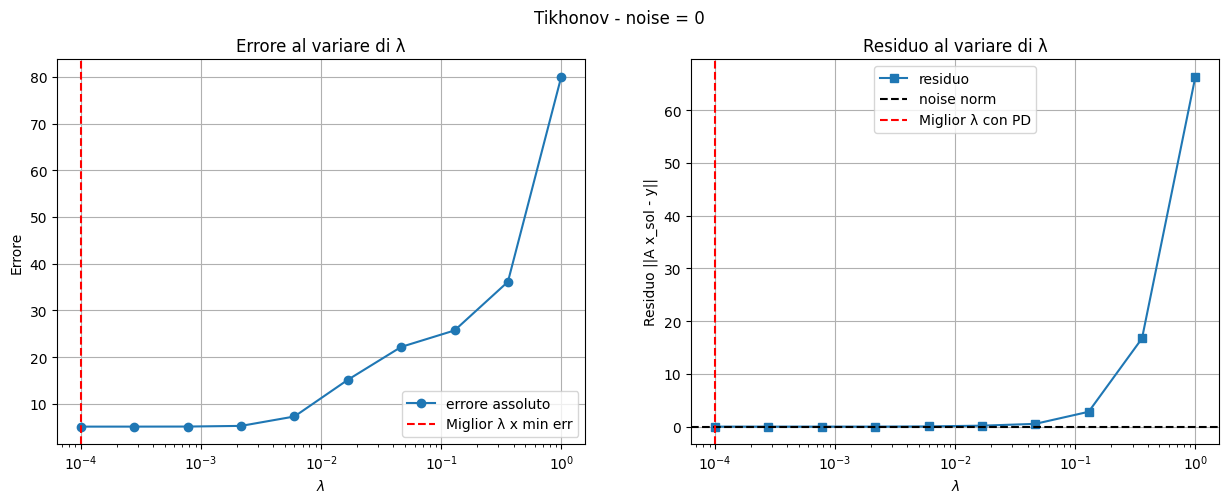


=== Tikhonov: Noise = 0.0001 =========

---lmbda = 1.000e-04---
ER   = 0.03753311617210449
PSNR = 31.712941033080693
SSIM = 0.6788011106636499

---lmbda = 2.783e-04---
ER   = 0.03754381717835762
PSNR = 31.710464966043524
SSIM = 0.6788733954034428

---lmbda = 7.743e-04---
ER   = 0.03763020976940086
PSNR = 31.690500707850212
SSIM = 0.6794115251752763

---lmbda = 2.154e-03---
ER   = 0.03860067702424748
PSNR = 31.469335055668715
SSIM = 0.681648568353625

---lmbda = 5.995e-03---
ER   = 0.05279984974438142
PSNR = 28.748579761059695
SSIM = 0.6323918559373194

---lmbda = 1.668e-02---
ER   = 0.10940854950515508
PSNR = 22.420208286450226
SSIM = 0.4966074287750744

---lmbda = 4.642e-02---
ER   = 0.16037135020515875
PSNR = 19.09869778084212
SSIM = 0.44830580840600254

---lmbda = 1.292e-01---
ER   = 0.185886649411811
PSNR = 17.816269506349304
SSIM = 0.45854263874164736

---lmbda = 3.594e-01---
ER   = 0.26124862337751875
PSNR = 14.860153280717599
SSIM = 0.43789064952728574

---lmbda = 1.000e+00---


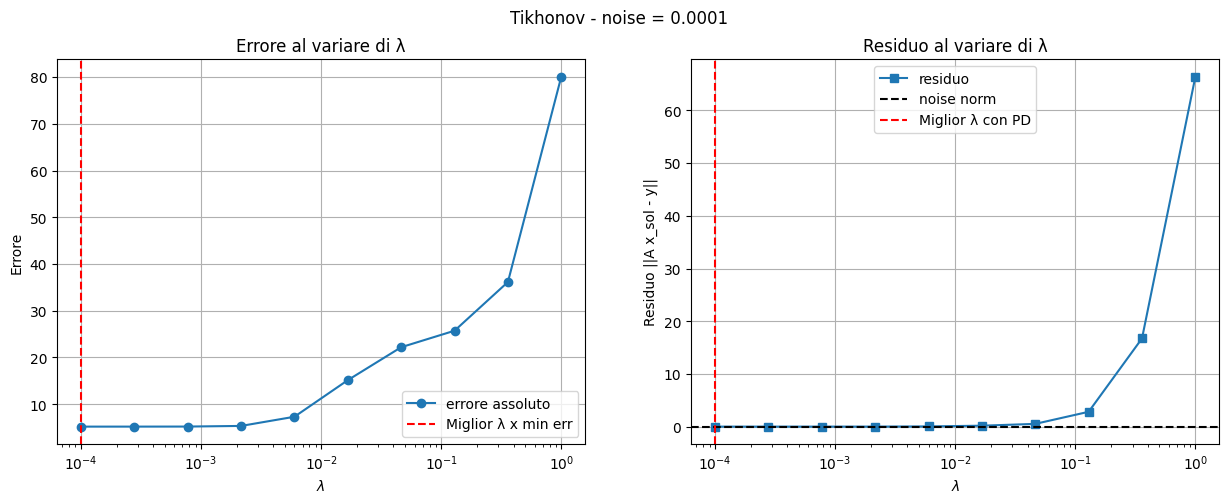


=== Tikhonov: Noise = 0.001 =========

---lmbda = 1.000e-04---
ER   = 0.057973196351240444
PSNR = 27.936688576825084
SSIM = 0.578817182937734

---lmbda = 2.783e-04---
ER   = 0.05794172985281503
PSNR = 27.94140435499591
SSIM = 0.5789874841801871

---lmbda = 7.743e-04---
ER   = 0.05774503017379156
PSNR = 27.97094124149624
SSIM = 0.5801288246315774

---lmbda = 2.154e-03---
ER   = 0.05663325319539696
PSNR = 28.13980330165357
SSIM = 0.587338890877223

---lmbda = 5.995e-03---
ER   = 0.061059914828477696
PSNR = 27.48610961037787
SSIM = 0.5858829898858097

---lmbda = 1.668e-02---
ER   = 0.11033463919296624
PSNR = 22.346995910722477
SSIM = 0.49259197966946017

---lmbda = 4.642e-02---
ER   = 0.16041700688402483
PSNR = 19.096225316566
SSIM = 0.44776558180151255

---lmbda = 1.292e-01---
ER   = 0.18588701084680528
PSNR = 17.81625261766241
SSIM = 0.45837586027467214

---lmbda = 3.594e-01---
ER   = 0.2612450786008163
PSNR = 14.860271136833807
SSIM = 0.43777974563365235

---lmbda = 1.000e+00---
ER   

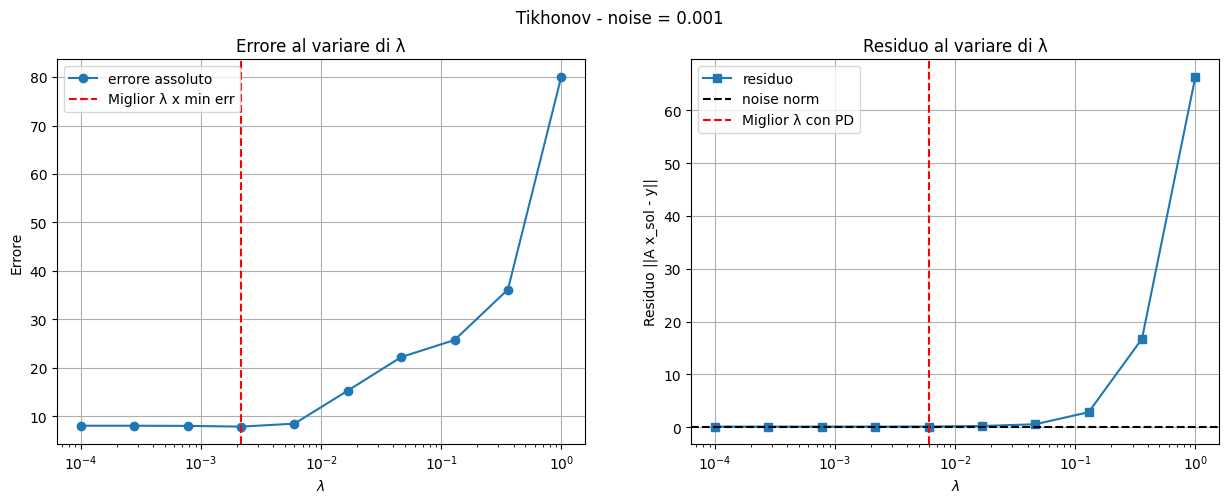


=== Tikhonov: Noise = 0.01 =========

---lmbda = 1.000e-04---
ER   = 0.5909167768590409
PSNR = 7.7707070875704325
SSIM = 0.18300367629167752

---lmbda = 2.783e-04---
ER   = 0.5898323504104648
PSNR = 7.78666172329069
SSIM = 0.18321594919556905

---lmbda = 7.743e-04---
ER   = 0.5824326990828372
PSNR = 7.896318508641356
SSIM = 0.18469295141988046

---lmbda = 2.154e-03---
ER   = 0.5301635976690814
PSNR = 8.713035399864946
SSIM = 0.19599461767572554

---lmbda = 5.995e-03---
ER   = 0.3367291539798249
PSNR = 12.655619109965969
SSIM = 0.2587126918942241

---lmbda = 1.668e-02---
ER   = 0.16838676080720213
PSNR = 18.675074640626246
SSIM = 0.3800784217327936

---lmbda = 4.642e-02---
ER   = 0.1637152614741473
PSNR = 18.919450172531672
SSIM = 0.43690656936094546

---lmbda = 1.292e-01---
ER   = 0.18599340218080784
PSNR = 17.811282722080755
SSIM = 0.4583557933056243

---lmbda = 3.594e-01---
ER   = 0.26124672188538234
PSNR = 14.860216500996952
SSIM = 0.437227625149981

---lmbda = 1.000e+00---
ER   = 

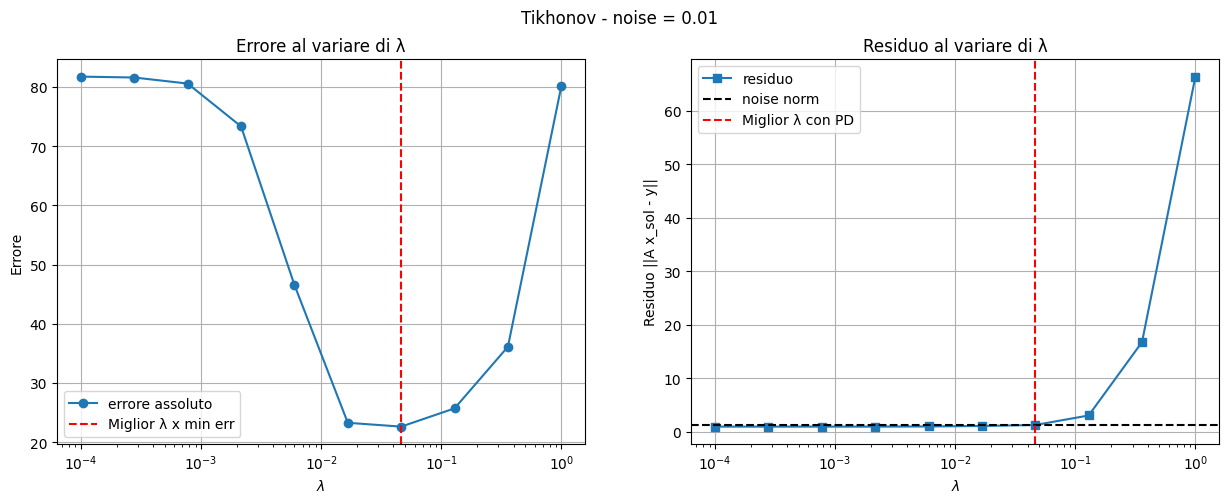

In [5]:
# Calcolo soluzione regolarizzata con il metodo di Tikhonov e lambda fissato
# Problema di minimo risolto con CGLS
x0 = np.zeros_like(x)
kmax = 200
tolf = 1e-8
tolx = 1e-8

# Scelta parametri Tikhonov (L e lambda)
L = operators.Identity()
lmbda_list=np.logspace(-4,0,10) #10 valori che vanno da 1e-4 a 1

for i, noise_level in enumerate(noise_lvl_list):
    err_list_lam = []
    resid_list_lam = []
    x_tik_list_lam=[]

    print(f"\n=== Tikhonov: Noise = {noise_level} =========")
    # Stima del "livello di rumore" (||y_delta - A(x)||)
    noise_norm = np.linalg.norm(y_delta_list[i] - A(x))

    for lmbda in lmbda_list:
        # Costruzione operatore di Tikhonov
        M = operators.TikhonovOperator(A, L, lmbda)

        # Definizione dati estesi ybar e ybar_delta
        ybar_delta_list=[]
        ybar = np.pad(y, ((0, 200), (0, 0)))
        ybar_delta = np.pad(y_delta_list[i], ((0, 200), (0, 0)))

        # Solver CGLS + Tikhonov
        cgls_tik_solver = solvers.CGLS(M)
        x_tik = cgls_tik_solver.solve(ybar_delta, x0, kmax, tolf, tolx)
        x_tik_list_lam.append(x_tik)

        #calcolo metriche errore
        print(f'\n---lmbda = {lmbda:.3e}---')
        print('ER   =',utilities.rel_err(x_tik,x))
        print('PSNR =',utilities.psnr(x_tik,x))
        print('SSIM =',utilities.ssim(x_tik,x))

        #Calcolo errore assoluto (||x_sol - x||) 
        err = np.linalg.norm(x_tik - x)  
        err_list_lam.append(err)

        # Calcolo residuo (||A x_sol - y_delta||)
        r = np.linalg.norm(A(x_tik) - y_delta_list[i])
        resid_list_lam.append(r)   

   #troviamo lambda che minimizza l'errore 
    idx_best = np.argmin(err_list_lam)
    lmbda_best = lmbda_list[idx_best]
    x_best= x_tik_list_lam[idx_best]
    print("\nlambda come valore che MINIMIZZA l'ERRORE ASSOLUTO fra l’immagine_GT e la ricostruzione ")
    print(f"- lambda migliore = {lmbda_best:.3e}")

    #Principio di Discrepanza (DP): cerco lambda nella lista  (residuo - noise_norm)
    diff_dp = np.abs(resid_list_lam - noise_norm) #lista = lista residuo - noise_norm
    idx_dp = np.argmin(diff_dp) #cerco l'indice dell'ragomento minimo nella lista diff
    lmbda_best_dp = lmbda_list[idx_dp] 
    x_best_dp = x_tik_list_lam[idx_dp]
    print("\nlambda trovato con il PRINCIPIO DI DISCREPANZA ")
    print(f"- lmbda migliore = {lmbda_best_dp:.3e}")
        
    # plot dell' errore al variare del lambda 
    plt.figure(figsize=(15,5))

    plt.subplot(1,2,1)
    plt.suptitle(f"Tikhonov - noise = {noise_level}")
    plt.semilogx(lmbda_list, err_list_lam, 'o-', label='errore assoluto')
    plt.axvline(lmbda_best, color='r', linestyle='--', label='Miglior λ x min err')
    #plt.axvline(lmbda_best_dp,   color='g', linestyle=':',  label='lmbda miglore con PD')
    plt.xlabel(r'$\lambda$')
    plt.ylabel('Errore')
    plt.title(f"Errore al variare di λ")
    plt.grid(True)
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.semilogx(lmbda_list, resid_list_lam, 's-', label='residuo')
    plt.axhline(noise_norm, color='k', linestyle='--', label='noise norm')
    #plt.axvline(lmbda_best, color='r', linestyle='--')
    plt.axvline(lmbda_best_dp,   color='r', linestyle='--', label='Miglior λ con PD' )
    plt.xlabel(r'$\lambda$')
    plt.ylabel('Residuo ||A x_sol - y||')
    plt.title("Residuo al variare di λ")
    plt.grid(True)
    plt.legend()
    plt.show()



- Calcolare la soluzione regolarizzata con Total Variation. Calcolare
il valore di λ come valore che minimizza l’errore assoluto (in norma 2)
fra l’immagine ground truth e la ricostruzione (su una griglia di
valori di λ) visualizzando il grafico relativo.


===Total Variation: Noise level = 0 ===

---lmbda = 1.000e-04---
ER   = 0.16993821665966613
PSNR = 18.595412365178014
SSIM = 0.4357123118585584

---lmbda = 2.783e-04---
ER   = 0.1739780911836738
PSNR = 18.39134226117619
SSIM = 0.4321723767676969

---lmbda = 7.743e-04---
ER   = 0.1783650921183866
PSNR = 18.1750362445696
SSIM = 0.43304123347123724

---lmbda = 2.154e-03---
ER   = 0.18455907598729382
PSNR = 17.878525350196796
SSIM = 0.44112926271516617

---lmbda = 5.995e-03---
ER   = 0.20080016235282153
PSNR = 17.145952301568236
SSIM = 0.4351206703318192

---lmbda = 1.668e-02---
ER   = 0.22326581011067295
PSNR = 16.224789047367366
SSIM = 0.39018519935910045

---lmbda = 4.642e-02---
ER   = 0.2406828689651715
PSNR = 15.572329900097646
SSIM = 0.3705963736111404

---lmbda = 1.292e-01---
ER   = 0.2694682497860475
PSNR = 14.591081461815987
SSIM = 0.36366899491904453

---lmbda = 3.594e-01---
ER   = 0.3192145084956111
PSNR = 13.119581052258999
SSIM = 0.363456453093107

---lmbda = 1.000e+00---
ER 

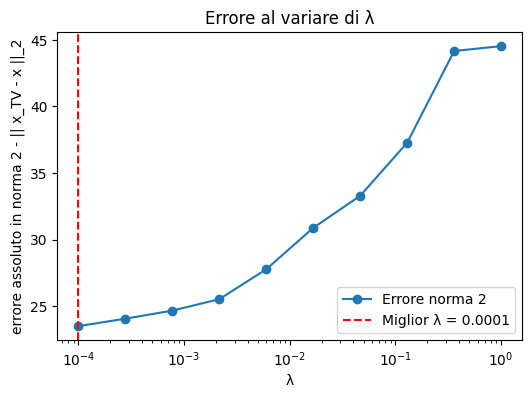


===Total Variation: Noise level = 0.0001 ===

---lmbda = 1.000e-04---
ER   = 0.16993570363693167
PSNR = 18.59554081185677
SSIM = 0.4357108329423926

---lmbda = 2.783e-04---
ER   = 0.17399845149557586
PSNR = 18.39032582816598
SSIM = 0.4321737440909453

---lmbda = 7.743e-04---
ER   = 0.178383017313341
PSNR = 18.1741633807134
SSIM = 0.43302130309565395

---lmbda = 2.154e-03---
ER   = 0.18457116464534903
PSNR = 17.87795644124153
SSIM = 0.4410179318018293

---lmbda = 5.995e-03---
ER   = 0.2009239640819069
PSNR = 17.140598736177864
SSIM = 0.4350120534688846

---lmbda = 1.668e-02---
ER   = 0.22331619838649455
PSNR = 16.222828972862043
SSIM = 0.39017315207868475

---lmbda = 4.642e-02---
ER   = 0.24068310636106
PSNR = 15.572321332834509
SSIM = 0.37059406854136423

---lmbda = 1.292e-01---
ER   = 0.26946843401575815
PSNR = 14.59107552346002
SSIM = 0.3636622180118095

---lmbda = 3.594e-01---
ER   = 0.3192146949507621
PSNR = 13.119575978779105
SSIM = 0.3634416552709543

---lmbda = 1.000e+00---
ER 

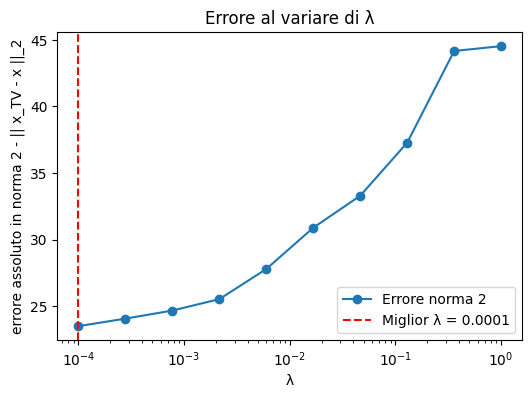


===Total Variation: Noise level = 0.001 ===

---lmbda = 1.000e-04---
ER   = 0.16995082437061315
PSNR = 18.5947679832021
SSIM = 0.4354043861184332

---lmbda = 2.783e-04---
ER   = 0.17405196743753332
PSNR = 18.387654757860663
SSIM = 0.43191790348963227

---lmbda = 7.743e-04---
ER   = 0.17839497885804173
PSNR = 18.173580964430304
SSIM = 0.43291114955143084

---lmbda = 2.154e-03---
ER   = 0.18457910807337055
PSNR = 17.877582632826623
SSIM = 0.4408247436304986

---lmbda = 5.995e-03---
ER   = 0.20096525826559083
PSNR = 17.138813782994298
SSIM = 0.43481691152717644

---lmbda = 1.668e-02---
ER   = 0.2233473703638006
PSNR = 16.22161662256503
SSIM = 0.3901578182329475

---lmbda = 4.642e-02---
ER   = 0.24119708823829694
PSNR = 15.553792280988482
SSIM = 0.37087038881186324

---lmbda = 1.292e-01---
ER   = 0.2694630739904306
PSNR = 14.591248297134458
SSIM = 0.3636665410671759

---lmbda = 3.594e-01---
ER   = 0.319211874003646
PSNR = 13.119652737599985
SSIM = 0.3632027897245643

---lmbda = 1.000e+00-

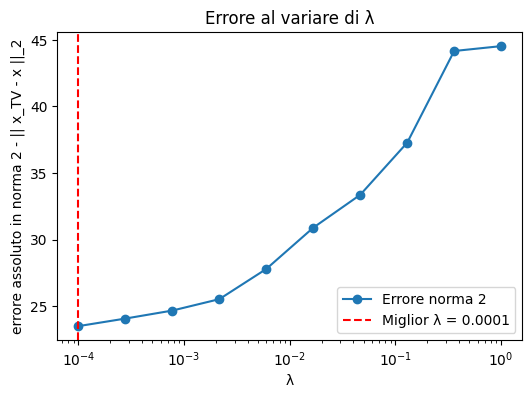


===Total Variation: Noise level = 0.01 ===

---lmbda = 1.000e-04---
ER   = 0.17101915756812328
PSNR = 18.540338238019224
SSIM = 0.43263288582981724

---lmbda = 2.783e-04---
ER   = 0.17442625025147931
PSNR = 18.36899660191043
SSIM = 0.43063557566439475

---lmbda = 7.743e-04---
ER   = 0.17867733016916307
PSNR = 18.159844403085646
SSIM = 0.4322696503532097

---lmbda = 2.154e-03---
ER   = 0.18468838484454572
PSNR = 17.872441828286053
SSIM = 0.43997290999554334

---lmbda = 5.995e-03---
ER   = 0.20099904927619286
PSNR = 17.137353429505033
SSIM = 0.4334903118169503

---lmbda = 1.668e-02---
ER   = 0.2240127006816719
PSNR = 16.195780655751165
SSIM = 0.38926841123688405

---lmbda = 4.642e-02---
ER   = 0.24756237100927828
PSNR = 15.327540824583576
SSIM = 0.3802384820339164

---lmbda = 1.292e-01---
ER   = 0.2691107944541026
PSNR = 14.602611126970636
SSIM = 0.3629363923652219

---lmbda = 3.594e-01---
ER   = 0.3193386058461625
PSNR = 13.116204995105331
SSIM = 0.36091415217311457

---lmbda = 1.000e+

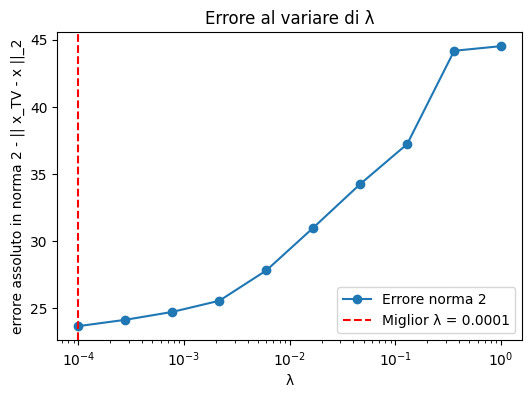

In [7]:
# Calcolo soluzione regolarizzata con Total Variation
# problema di minimo risolto con Discesa Gradiente

# Solver per Total Variation
gd_tv_solver = solvers.GDTotalVariation(A, beta=1e-3)

for i, noise_level in enumerate(noise_lvl_list):
    # Vettore per salvare l'errore in norma 2 su ciascun lambda
    err_n2_lam = []

    print(f"\n===Total Variation: Noise level = {noise_level} ===")
    
    # Calcola la soluzione TV per tutti i lambda nella griglia
    for lmbda in lmbda_list:
        # Risolvi il problema di minimi quadrati + regolarizzazione TV
        x_TV, obj_val_temp, grad_norm_temp = gd_tv_solver.solve(y_delta_list[i], lmbda, x0, kmax, tolf, tolx)
        
        #calcolo metriche errore
        print(f'\n---lmbda = {lmbda:.3e}---')
        print('ER   =',utilities.rel_err(x_TV,x))
        print('PSNR =',utilities.psnr(x_TV,x))
        print('SSIM =',utilities.ssim(x_TV,x))

        # Errore in norma 2 tra la soluzione ricostruita e l'immagine ground truth
        err = np.linalg.norm(x_TV - x)
        err_n2_lam.append(err)

    # Trova il lambda che minimizza l'errore
    best_idx = np.argmin(err_n2_lam)
    lmbda_best_tv = lmbda_list[best_idx]
    err_min = err_n2_lam[best_idx]

    print(f"\nMiglior lambda = {lmbda_best_tv:.3e}")
    print(f"Errore minimo in norma 2 = {err_min:.3e}")

    # Visualizza il grafico Errore al variare di lmbda
    plt.figure(figsize=(6, 4))
    plt.plot(lmbda_list, err_n2_lam, marker='o', label='Errore norma 2')
    plt.axvline(x=lmbda_best_tv, color='r', linestyle='--', label=f'Miglior λ = {lmbda_best_tv}')
    plt.title(f"Errore al variare di λ")
    plt.xlabel("λ")
    plt.ylabel("errore assoluto in norma 2 - || x_TV - x ||_2")
    plt.xscale("log")  # utile se vuoi scala log per λ
    plt.legend()
    plt.show()


Ripetere i punti precedenti per diversi livelli di rumore (tre-quattro) nell’intervallo
[0, 0.01] (provare entrambi gli estremi dell’intervallo) e con due diversi valori dei parametri del nucleo gaussiano della Point Spread Function.

N.B: Controllare che i metodi iterativi di minimizzazione (CGLS e gradiente) escano per raggiunto criterio di arresto e non per numero massimo
di iterazioni. In tal caso aumentare il numero massimo di iterazioni.

Riportare in un documento pdf i risultati ottenuti in termini di immagini, grafici (visualizzare per esempio il grafico dell’ errore al variare delle
iterazioni nei diversi casi), tabelle con le metriche di valutazione viste a
lezione, che verrà poi eventualmente discusso durante la prova orale.